# **Waze Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

Your team is still in the early stages of their user churn project. So far, you’ve completed a project proposal and used Python to inspect and organize Waze’s user data.

You check your inbox and notice a new message from Chidi Ga, your team’s Senior Data Analyst. Chidi is pleased with the work you have already completed and requests your assistance with exploratory data analysis (EDA) and further data visualization. Harriet Hadzic, Waze's Director of Data Analysis, will want to review a Python notebook that shows your data exploration and visualization.

A notebook was structured and prepared to help you in this project. Please complete the following questions and prepare an executive summary.

# **Course 3 End-of-course project: Exploratory data analysis**

In this activity, you will examine data provided and prepare it for analysis.
<br/>

**The purpose** of this project is to conduct exploratory data analysis (EDA) on a provided dataset.

**The goal** is to continue the examination of the data that you began in the previous Course, adding relevant visualizations that help communicate the story that the data tells.
<br/>


*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluating and sharing results

<br/>


Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the [PACE Strategy Document ](https://docs.google.com/document/d/1iSHdbfQR6w8RClJNWai8oJXn9tQmYoTKn6QohuaK4-s/template/preview?resourcekey=0-ZIHnbxL1dd2u9A47iEVXvg).

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# **Visualize a story in Python**


# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.



## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.



### **Task 1. Imports and data loading**

For EDA of the data, import the data and packages that will be most helpful, such as pandas, numpy, and matplotlib.




In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read in the data and store it as a dataframe object called df.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [29]:
# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')


## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code:
1. Does the data need to be restructured or converted into usable formats?
> The data is already in a structured format each row represents a users data for the month.

2. Are there any variables that have missing data?
> Yes 700 rows have no value in the "label" column which is what tells you .

### **Task 2. Data exploration and cleaning**

Consider the following questions:



1.  Given the scenario, which data columns are most applicable?
> Columns label, sessions, drives, total_sessions, n_days_after_onboarding, driven_km_drives, duration_minutes_drives, activity_days, driving_days and device can be important to understanding why users churn and for predicting who will churn

2.  Which data columns can you eliminate, knowing they won’t solve your problem scenario?
> total_navigations_fav1 and total_navigations_fav2 may or may not play a part in the reason why users churn. I wouldn't remove those two columns but they seem like they are probably the most useless columns in the dataset for our situation.

3.  How would you check for missing data? And how would you handle missing data (if any)?
> From using the describe() method we can see that there are 14,999 rows in the ID column which is the primary key for each record, all the other columns match this amount in the count row meaning that there are no NaN, Na or null values in the dataframe. However there may be values that were input to represent null or NaN like "(null)" or 0. To check for these kinds of missing data I'll use the value_counts method to see every unique value in the dataset and if I see something like "empty", "none", or "null" then I can remove them if they interfere with my analysis.

4.  How would you check for outliers? And how would handle outliers (if any)?
> We can check for outliers using matplotlib and/or seaborn to create visualizations like scatter plots or box plots. Once we find outliers we can easily remove them from the dataframe with pandas.






#### **Data overview and summary statistics**

Use the following methods and attributes on the dataframe:

* `head()`
* `size`
* `describe()`
* `info()`

It's always helpful to have this information at the beginning of a project, where you can always refer back to if needed.

In [30]:
# Print the first 5 recordings in the dataframe
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [31]:
# Prints the number of cells in the Dataframe/Series in this case the column ID
df['ID'].size

14999

Generate summary statistics using the `describe()` method.

In [32]:
# Generate descriptive statistics for the data frames numeric columns
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


And summary information using the `info()` method.

In [33]:
# Print a summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB



## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

Consider the following questions as you prepare to deal with outliers:

1.   What are some ways to identify outliers?
> We can identify outliers with boxplots and other data visualizations.

2.   How do you make the decision to keep or exclude outliers from any future models?
> We can chose to delete, reassign, keep outliers. If outliers are mistakes or typos in the data that don't make sense then we can delete them. If they will interfere with our analysis or model we'll reassign them to a value that won't. Lastly if they don't affect our analysis then we can just leave them as they are.

### **Task 3a. Visualizations**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the Waze dataset.

**Question:** What type of data visualization(s) will be most helpful?

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


> Box plots, Histograms, Scatter plots, Bar charts and line graphs will probably be most helpful in our EDA.

Begin by examining the spread and distribution of important variables using box plots and histograms.

#### **`sessions`**

_The number of occurrence of a user opening the app during the month_

Text(0.5, 1.0, 'sessions box plot')

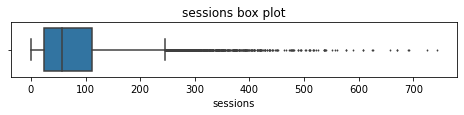

In [34]:
# Box plot for number of times users opened the app during the month
plt.figure(figsize=(8,1))
sns.boxplot(x=df['sessions'], fliersize=1)
plt.title('sessions box plot')

Text(75, 1200, 'median=56.0')

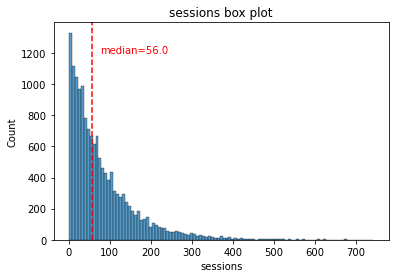

In [35]:
# Histogram
# Making the histogram
plt.figure(figsize=(6,4))
sns.histplot(x=df['sessions'])
plt.title('sessions box plot')

# Plotting median line
median = df['sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(75,1200, 'median=56.0', color='red')


The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

Text(0.5, 1.0, 'Total Drives Boxplot')

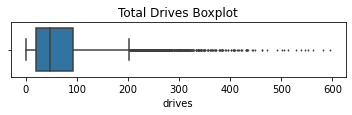

In [36]:
# Box plot
# Creating a boxplot for users' total drives during the month (>=1km)
plt.figure(figsize=(6,1))
sns.boxplot(x=df['drives'], fliersize=1)
plt.title('Total Drives Boxplot')

In [37]:
# Helper function to plot histograms to cut repetitiveness
def histogrammer(data, column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(data[column_str].median(), 1)
    plt.figure(figsize=(8,4))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

In [38]:
# Helper function to create boxplots to also cut repetitiveness
def boxploter(column_name,title,**kwargs):
    plt.figure(figsize=(6,1))
    sns.boxplot(x=df[column_name], fliersize=1)
    plt.title(title)

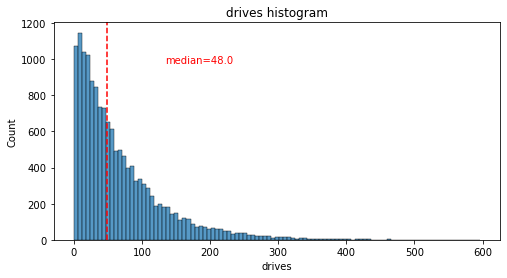

In [39]:
# Histogram for total drives during the month from users (>=1km)
histogrammer(df,'drives')

The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

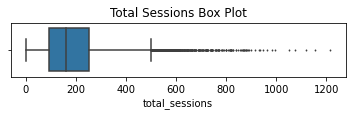

In [40]:
# Box plot for total number of sessions since users signed up
boxploter('total_sessions', 'Total Sessions Box Plot')

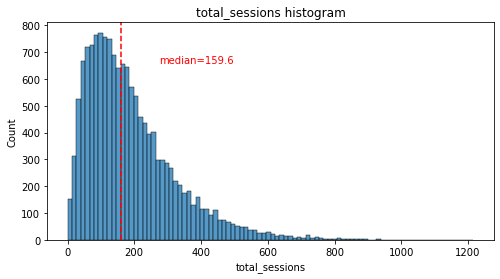

In [41]:
# Histogram for total number of sessions since users signed up
histogrammer(df,'total_sessions')

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something you can examine more closely later.

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

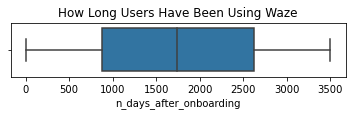

In [42]:
# Box plot for total number of days since users signed up for the app
boxploter('n_days_after_onboarding', 'How Long Users Have Been Using Waze')

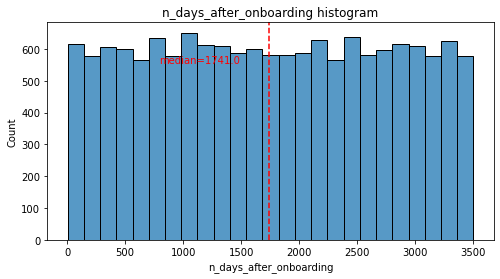

In [43]:
# Histogram for total number of days since users signe up for the app
histogrammer(df, 'n_days_after_onboarding')

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`driven_km_drives`**

_Total kilometers driven during the month_

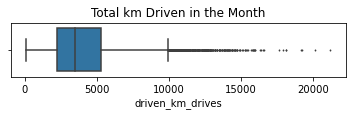

In [44]:
# Box plot for total kilometers driven during the month
boxploter('driven_km_drives', 'Total km Driven in the Month')

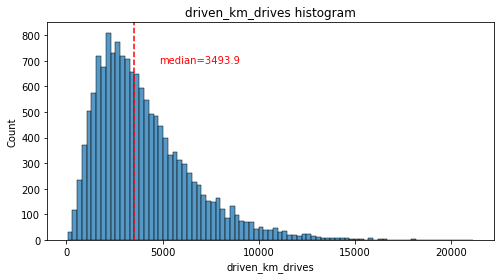

In [45]:
# Histogram for total kilometers driven during the month
histogrammer(df, 'driven_km_drives')

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As you discovered in the analysis from the previous course, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

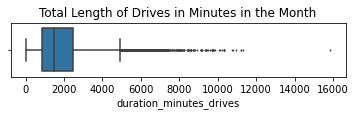

In [46]:
# Box plot for total app usage in minutes during the month
boxploter('duration_minutes_drives', 'Total Length of Drives in Minutes in the Month')

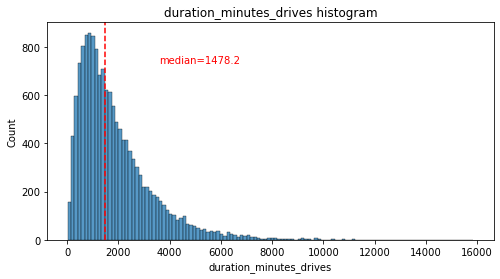

In [47]:
# Histogram for total app usage in minutes during the month
histogrammer(df, 'duration_minutes_drives')

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`**

_Number of days the user opens the app during the month_

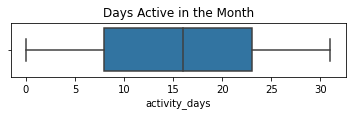

In [48]:
# Box plot for number of active days(opened the app) during the month
boxploter('activity_days', 'Days Active in the Month')

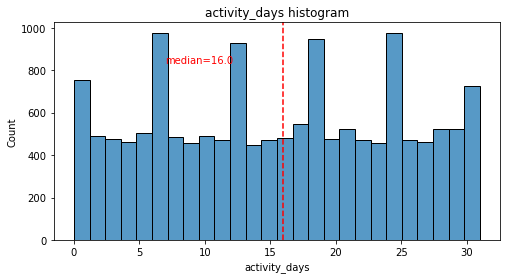

In [49]:
# Histogram for number of active daya(opened the app) during the month
histogrammer(df, 'activity_days')

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which you might think would be closely correlated with `activity_days`.

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

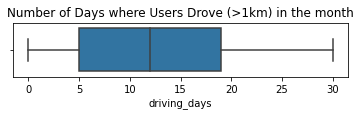

In [50]:
# Box plot for total days where users drove at least 1km during the month
boxploter('driving_days', 'Number of Days where Users Drove (>1km) in the month')

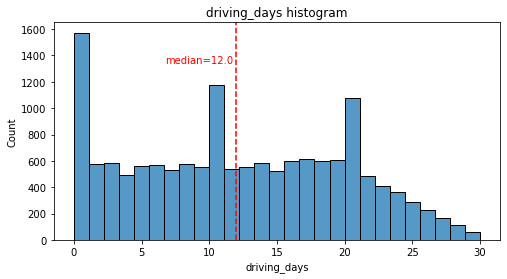

In [51]:
# Histogram for total days where users drove at least 1km during the month
histogrammer(df, 'driving_days')

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

#### **`device`**

_The type of device a user starts a session with_

This is a categorical variable, so you do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

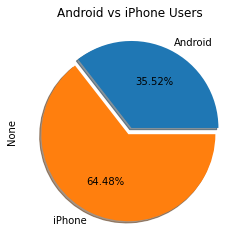

In [52]:
# Pie chart for users device distribution
df.groupby('device').size().plot(kind="pie",autopct="%.2f%%",title="Android vs iPhone Users",shadow=True, explode=[0.04,0.04])

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.

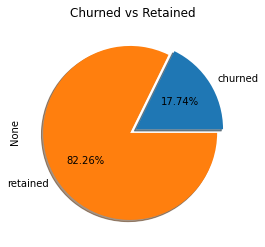

In [53]:
# Pie chart 
df.groupby('label').size().plot(kind='pie', autopct='%.2f%%',title="Churned vs Retained", explode=[0.04,0.04], shadow=True)

Less than 18% of the users churned.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `activity_days`.

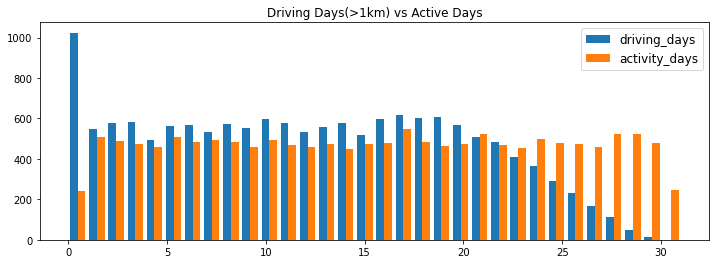

In [54]:
# Histogram Number of Driving Days vs Number of Active Days
plt.figure(figsize=(12,4))
plt.hist([df['driving_days'],df['activity_days']], label=['driving_days','activity_days'],bins=32)
plt.legend(prop={'size': 12})
plt.title('Driving Days(>1km) vs Active Days')

plt.show()

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [55]:
# Confirming the maximum number of driving days and activity days.
df[['driving_days', 'activity_days']].max()

driving_days     30
activity_days    31
dtype: int64

It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

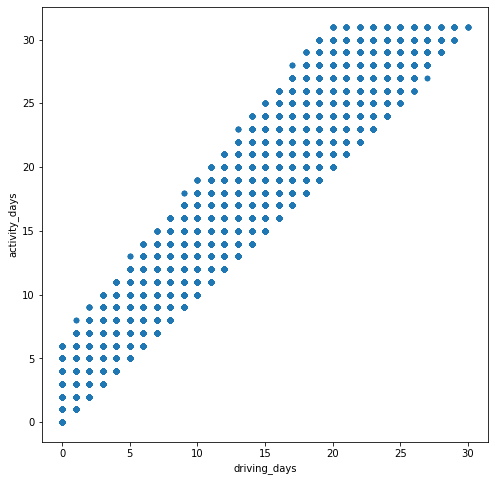

In [56]:
# Scatter plot comparing driving days to activity days
df.plot.scatter(x='driving_days',y='activity_days',figsize=(8,8))

Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### **Retention by device**

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

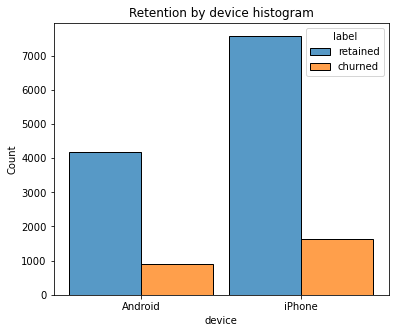

In [57]:
# Histogram for churn and retention by device
plt.figure(figsize=(6,5))
sns.histplot(data=df, x='device', hue='label', multiple='dodge', shrink=0.9)
plt.title('Retention by device histogram');

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

In the previous course, you discovered that the median distance driven last month for users who churned was 8.33 km, versus 3.36 km for people who did not churn. Examine this further.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [58]:
df

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone
14995,14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android
14996,14996,retained,273,219,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone
14997,14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,iPhone


In [59]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives']/df['driving_days']
# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

What do you notice? The mean value is infinity, the standard deviation is NaN, and the max value is infinity. Why do you think this is?

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [60]:
# 1. Convert infinite values to zero
df['km_per_driving_day'].replace([np.inf,-np.inf], 0, inplace = True)
# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

Plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the `multiple` parameter of seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to `fill`.

Text(0.5, 1.0, 'Churn Rate by Mean Driving Distance')

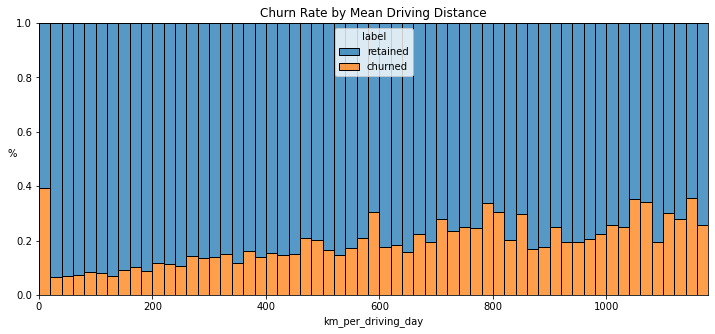

In [61]:
# Histogram for churned vs retained by mean driving distance (<1200km driving distance)
plt.figure(figsize=(12,5))
sns.histplot(data=df[df['km_per_driving_day'] < 1200],x='km_per_driving_day',hue='label',multiple="fill",bins=range(0,1200,20))
plt.ylabel("%",rotation=0)
plt.title("Churn Rate by Mean Driving Distance")

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

Text(0.5, 1.0, 'Churn Rate by User Driving Days in The Month')

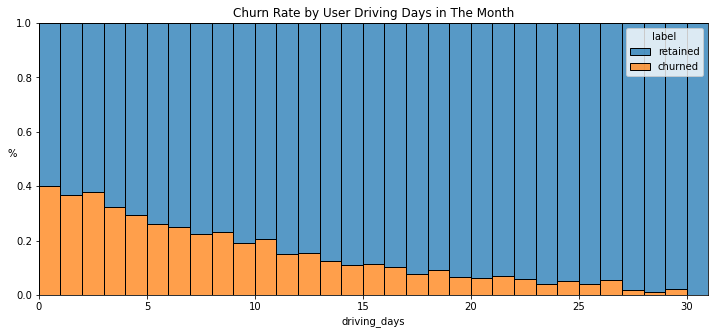

In [62]:
# Histogram for churnned vs retained by user driving days from last month
plt.figure(figsize=(12,5))
sns.histplot(data=df,x='driving_days',hue="label",multiple="fill",bins=range(0,32))
plt.ylabel("%",rotation=0)
plt.title("Churn Rate by User Driving Days in The Month")

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Proportion of sessions that occurred in the last month**

Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [63]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

What is the median value of the new column?

In [64]:
df['percent_sessions_in_last_month'].median()

0.42309702992763176

Now, create a histogram depicting the distribution of values in this new column.

Median: 0.4


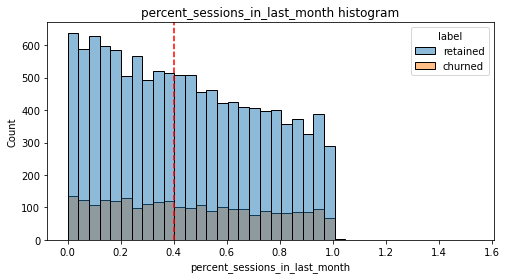

In [65]:
# Histogram for churned vs retained with lifetime sessions percentage
histogrammer(df, 'percent_sessions_in_last_month', hue=df['label'], multiple='layer', median_text=False)

Check the median value of the `n_days_after_onboarding` variable.

In [66]:
df['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

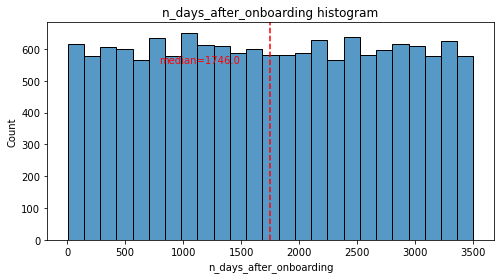

In [67]:
# Histogram for number of days after onboarding from people with >40% sessions in the last month
df1 = df[df['percent_sessions_in_last_month'] >= .4]
histogrammer(df1, 'n_days_after_onboarding')

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### **Task 3b. Handling outliers**

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

Depending on what you'll be doing with this data, it may be useful to impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution.

To practice this technique, write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile.  such as the 95th percentile of the distribution.



In [68]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

Next, apply that function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [69]:
for col in ['sessions','drives','total_sessions','driven_km_drives', 'duration_minutes_drives']:
    outlier_imputer(col,.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999999


Call `describe()` to see if your change worked.

In [70]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.530637


#### **Conclusion**

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

Perhaps you feel that the more deeply you explore the data, the more questions arise. This is not uncommon! In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.


## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4a. Results and evaluation**

Having built visualizations in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

**Pro tip:** Put yourself in your client's perspective. What would they want to know?

Use the following code fields to pursue any additional EDA based on the visualizations you've already plotted. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

**Ask yourself:** Did you consider color, contrast, emphasis, and labeling?



We have learned 

* There is missing data(700 entries) in the label column which tells you if the user churned or not. That column is essential to our task.
* The data contains many outliers when it comes to measurements that tell you about app usage and distances traveled.
* Less than 18% of users from the dataset have churned.
* Users have less driving days with waze towards the end of the month but are still opening the app consistently. 
* Retention rate has nothing to do with the device users are on. Iphone and Android devices have similar retention rates. 
* The number of drives and the number of sessions are both strongly correlated, so they might provide redundant information when we incorporate both in a model.
* On average retained users have fewer drives than churned users
My other questions are 
* Why is there missing data in the label column? How did that get through to the dataset?
* Where are the outliers coming from? Who are the users with such high kms driven, sessions, and drives in general? Is it an error or is it accurate?
* Why do retained users have more fewer drives than churned users?
* Is there a common demographic or any more personal information we can get from users that will help us determine why they use waze.

My client would likely want to know ...
* Are there any recognizable patterns in churned users data that can help determine why they churn?
* What can we do to help reduce user churn rates.



### **Task 4b. Conclusion**

Now that you've explored and visualized your data, the next step is to share your findings with Harriet Hadzic, Waze's Director of Data Analysis. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. What types of distributions did you notice in the variables? What did this tell you about the data?
> *Many of the variables had right skewed distributions and the higher values were very high as well. This tells me that either the some of the data collected was inaccurate or that we have app users that are driving 20,000 kilometers in a month.*
2. Was there anything that led you to believe the data was erroneous or problematic in any way?
> *The column for the duration of rides in the month has a few users that drove for more than 10,000 minutes which is equal to almost 7 days. One user even drove almost 16,0000 minutes (~11 days) this is possible but I would just want to confirm it's true. In the distance driven column some users drove 20,000km in the month. That is a hefty distance I'd also just want to confirm that as well.*
3. Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?
> *The active days vs driving days visualization I made shows that driving days have a steep decline towards the end of the month but people are still opening the Waze app as they normally have been all month. This is an interesting point that made me question the accuracy of the driving days and active day column. I'd also like to know how rows with missing "label" values got through.*
4. What percentage of users churned and what percentage were retained?
> *~17% of users churned and ~83% of useres were retained.*
5. What factors correlated with user churn? How?
> *Users who churned traveled greater distances with the app than retained users but also usd the app less days.*
6. Did newer uses have greater representation in this dataset than users with longer tenure? How do you know?
> *No all users were represented eavenly. In the visualization "n_days_after_onboarding" histogram we see a normal distribution from users who've been onboard from 0-3500 days.*

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.